In [82]:
import sys 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [86]:
noise01 = pd.read_csv(r"0.01-noise-3-trials.csv")
print(list(noise01.columns))
noise05 = pd.read_csv(r"0.05-noise-3-trials.csv")
print(list(noise05.columns))
noises = pd.read_csv(r"3-trials-data.csv")
print(list(noises.columns))

['frame_size', 'scale_factor', 'noise_coefficient', 'avg_relative_abs_err']
['frame_size', 'scale_factor', 'noise_coefficient', 'avg_relative_abs_err']
['frame_size', 'scale_factor', 'noise_coefficient', 'avg_relative_abs_err']


In [87]:
noise01["Frame Size"] = np.absolute(noise01["frame_size"])
noise01["Scale Factor"] = np.absolute(noise01["scale_factor"])
noise01 = noise01[noise01["avg_relative_abs_err"] < 50]

(98, 96)
(33, 32)


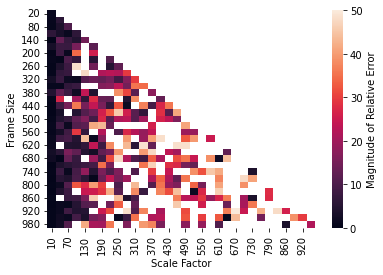

In [88]:
skip = 3
display_01 = noise01.pivot("Frame Size", "Scale Factor", "avg_relative_abs_err")
print(display_01.shape)
display_01 = display_01.iloc[::skip]
display_01 = display_01.transpose()
display_01 = display_01.iloc[::skip]
display_01 = display_01.transpose()
print(display_01.shape)
ax = sns.heatmap(display_01, vmin = 0, vmax = 50, cbar_kws={'label': 'Magnitude of Relative Error'})

In [77]:
outliers = noise01[noise01["avg_relative_abs_err"] > 300]
print(outliers)

Empty DataFrame
Columns: [frame_size, scale_factor, noise_coefficient, avg_relative_abs_err, Frame Size, Scale Factor]
Index: []


In [78]:
noise05["Frame Size"] = np.absolute(noise05["frame_size"])
noise05["Scale Factor"] = np.absolute(noise05["scale_factor"])
noise05 = noise05[noise05["avg_relative_abs_err"] <= 1]

(87, 14)
(87, 14)


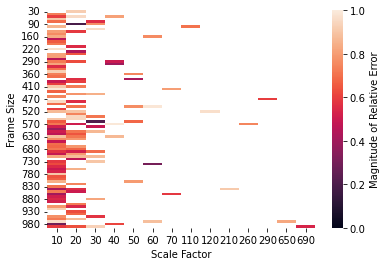

In [79]:
skip = 1
display_05 = noise05.pivot("Frame Size", "Scale Factor", "avg_relative_abs_err")
print(display_05.shape)
display_05 = display_05.iloc[::skip]
display_05 = display_05.transpose()
display_05 = display_05.iloc[::skip]
display_05 = display_05.transpose()
print(display_05.shape)
ax = sns.heatmap(display_05, vmin = 0, vmax = 1, cbar_kws={'label': 'Magnitude of Relative Error'})

In [80]:
display_noise_range = noises[noises["frame_size"]==60]
display_noise_range = display_noise_range[display_noise_range["scale_factor"] == 12]
display_noise_range["Noise Coefficient"] = np.absolute(display_noise_range["noise_coefficient"])
display_noise_range["Error Magnitude"] = np.absolute(display_noise_range["avg_relative_abs_err"])

<AxesSubplot:xlabel='Noise Coefficient', ylabel='Error Magnitude'>

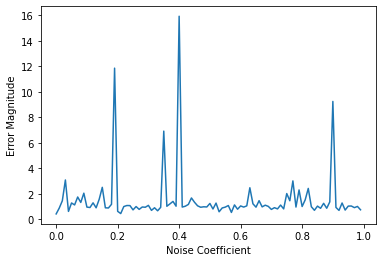

In [81]:
sns.lineplot(data = display_noise_range, x = "Noise Coefficient", y = "Error Magnitude")